Clase 18 de octubre de 2022

In [ ]:
from pylab import *

In [ ]:
def RK2(f, t_intervalo,y0,delta= 0.01):
  t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
  sol = zeros((len(y0),len(t)))
  sol[:,0] = y0
  for i in range(len(t)-1):
      vec_n = sol[:,i] + 0.5*delta*f(t[i],sol[:,i])
      sol[:,i+1] = sol[:,i] + delta*f(t[i]+0.5*delta,vec_n)
  return (t,sol)

Queremos resolver $x'' + \omega²x=0$ con $x(0)=x_0)$ y $x'(0)=0$. Pero eso lo poemos ver como el siguiente sistema de ecuaciones:
$$x'= v$$
$$v' = -\omega²x$$
Con $(x(0),v(0))=(x_0,0)$

In [ ]:
def osc_armonico(t,x,omega2=1):
  # x == (x,v)
  dx = x[1]
  dv = -omega2*x[0]
  return array([dx,dv])

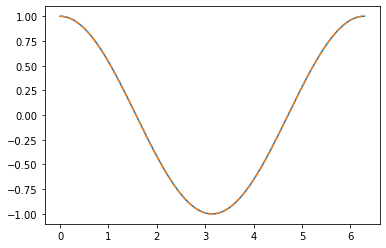

In [ ]:
solucion = RK2(osc_armonico,[0,2*pi],[1,0])
# solucion[0] # sol de tiempo
plot(solucion[0],solucion[1][0])
plot(solucion[0],cos(solucion[0]),'--')
show()

In [ ]:
def RK4(f, t_intervalo,y0,delta= 0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros((len(y0),len(t)))
    sol[:,0] = y0
    for i in range(len(t)-1):
        k1 = f(t[i],sol[:,i])
        k2 = f(t[i] + 0.5*delta,sol[:,i] + 0.5*delta*k1)
        k3 = f(t[i] + 0.5*delta,sol[:,i] + 0.5*delta*k2)
        k4 = f(t[i] + delta,sol[:,i] + delta*k3)
        sol[:,i+1] = sol[:,i] + (delta/6)*(k1 + 2*k2+2*k3+k4)
    return (t,sol)

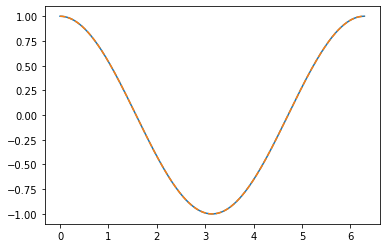

In [ ]:
solucion = RK4(osc_armonico,[0,2*pi],[1,0])
# solucion[0] # sol de tiempo
plot(solucion[0],solucion[1][0])
plot(solucion[0],cos(solucion[0]),'--')
show()

In [ ]:
def ode_exp(f ,t_intervalo ,y0 ,jac, delta=0.01):
  t = arange(t_intervalo[0], t_intervalo[1]+delta, delta)
  sol = zeros((len(y0),len(t)))
  sol[:,0] = y0
  for i in range(len(t)-1):
    sol[:,i+1] = sol[:,i] + delta*f(t[i],sol[:,i]) + 0.5*(delta**2)*dot(jac(t[i],sol[:,i]),f(t[i],sol[:,i]))
  return (t,sol)

In [ ]:
def jac_osc_armonico(t,x,omega2=1):
  # x == (x,v)
  return array([[0,1.0],[-omega2,0]])

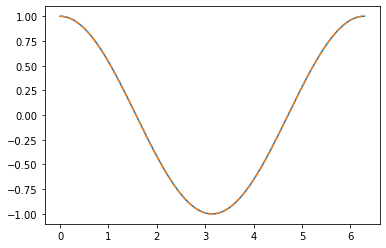

In [ ]:
solucion = ode_exp(osc_armonico,[0,2*pi],[1,0],jac_osc_armonico)
# solucion[0] # sol de tiempo
plot(solucion[0],solucion[1][0])
plot(solucion[0],cos(solucion[0]),'--')
show()

In [ ]:
from scipy.integrate import *

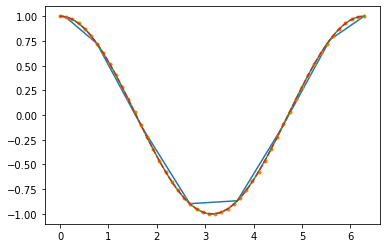

In [ ]:
solucion = solve_ivp(osc_armonico,(0,2*pi),[1,0],dense_output= True)
#solucion.t
#solucion.y
t = linspace(0,2*pi)
plot(solucion.t,solucion.y[0])
plot(t,solucion.sol(t)[0],'.')
solucion = RK2(osc_armonico,[0,2*pi],[1,0])
# solucion[0] # sol de tiempo
plot(solucion[0],solucion[1][0])
plot(solucion[0],cos(solucion[0]),'--')
show()
